In [1]:
import numpy as np
import matplotlib.pyplot as plt
i=complex(0,1)

In [42]:
def eigenvalues(a_by_l_B,n=20):
    t=1

    H=np.zeros(shape=(n*n,n*n),dtype=np.complex_)
    for l in range(0,n*n):
        t_prime=np.exp(i*2*np.pi*(l%n)*a_by_l_B)
        if (l%n!=0 and (l+1)%n!=0 and l>=n and l<n*n-n):
            H[l][l+1]=-t
            H[l][l-1]=-t
            H[l][l+n]=-t_prime
            H[l][l-n]=np.conjugate(-t_prime)
        if(l%n==0):
            H[l][l+1]=-t
            if (l!=0):
                H[l][l-n]=np.conjugate(-t_prime)
            if(l!=n*n-n):
                H[l][l+n]=-t_prime
        if((l+1)%n==0):
            H[l][l-1]=-t
            if (l!=n-1):
                H[l][l-n]=np.conjugate(-t_prime)
            if(l!=n*n-1):
                H[l][l+n]=-t_prime
        if(l<n-1 and 0<l):
            H[l][l+1]=-t
            H[l][l-1]=-t
            H[l][l+n]=-t_prime
        if(l<n*n-1 and n*n-n<l):
            H[l][l+1]=-t
            H[l][l-1]=-t
            H[l][l-n]=-t_prime
    eigvals,_=np.linalg.eig(H)
    return eigvals
        

In [44]:
eig_ranges=[]

a_by_l_B_range = np.linspace(0,1,50)
for j in range(0,len(a_by_l_B_range)):
    eig_ranges.append(eigenvalues(a_by_l_B_range[j],n=30))

Text(0, 0.5, 'E/t')

<Figure size 432x288 with 0 Axes>

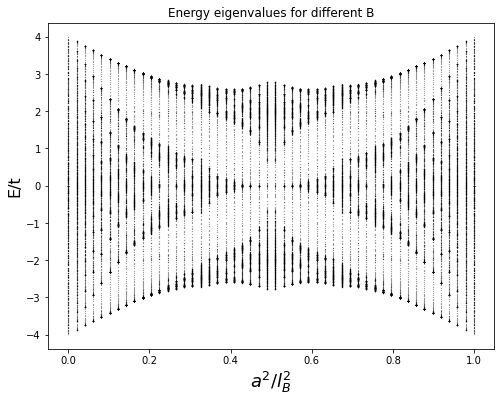

In [48]:




fig = plt.figure()

fig.suptitle('test title', fontsize=20)

plt.figure(figsize=(8,6))
for k in range(0,len(a_by_l_B_range)):
    x=np.full(np.shape(eig_ranges[k]),a_by_l_B_range[k])
    plt.scatter(x,np.real(eig_ranges[k]), marker='.', color='k', s=0.09)
    
plt.title("Energy eigenvalues for different B")
plt.xlabel('$a^2/l_{B}^2$', fontsize=18)
plt.ylabel('E/t', fontsize=16)
#fig.savefig('test.jpg')


In [2]:
from scipy.linalg import ishermitian as isHerm 
from matplotlib.pyplot import figure
import matplotlib as mpl
from numba import jit
import numpy as np

In [3]:
t=100
Beta=np.array([[-t,0],[0,t]],dtype=np.complex_)

I_2=np.array([[1,0],[0,1]],dtype=np.complex_)
    
N=15


In [4]:
sigma_z=np.array([[1,0],[0,-1]])

In [5]:
Delta=1
mu=30
eta=0.01
T=0.001         

In [335]:
A=np.array([[2,0],[0,-2]])
B=np.array([[0,-i],[i,0]])
print(A*5)

[[ 10   0]
 [  0 -10]]


In [53]:
def greens_function_E(E=0,phi=0,Delta=1,mu=1,eta=0.01,N=10):
    
    Alpha_R=np.array([[2*t-mu,Delta],[Delta,-2*t+mu]],dtype=np.complex_)
    Alpha_L=np.array([[2*t-mu,Delta*np.exp(i*phi)],[Delta*np.exp(-i*phi),-2*t+mu]],dtype=np.complex_)
    
    H = np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    I_N=np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    for k in range(0,N):
        for l in range(0,N):
            if(k==l):
                H[2*k][2*l]= 2*t-mu
                H[2*k+1][2*l+1]= -2*t+mu
            if(l==k+1 or k==l+1):
                H[2*k][2*l]= -t
                H[2*k+1][2*l+1]= t
                
    for k in range(0,2*N):
        I_N[k][k]=1
    
   
    g_R=np.array([[0,0],[0,0]],dtype=np.complex_)
    g_R_prev=g_R
    g_R=np.linalg.inv((E+i*eta)*I_2 - Alpha_R -\
                           np.matmul(np.matmul( np.transpose(np.conjugate(Beta)),g_R_prev),Beta))
    
    g_L=np.array([[0,0],[0,0]],dtype=np.complex_)
    g_L_prev=g_L
    g_L=np.linalg.inv((E+i*eta)*I_2 - Alpha_L -\
                           np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L_prev),Beta))
    
    
    while(trace_dist(g_R,g_R_prev)>10**-10):
        g_R_prev=g_R
        g_R=np.linalg.inv((E+i*eta)*I_2 - Alpha_R -\
                            np.matmul(np.matmul( np.transpose(np.conjugate(Beta)),g_R_prev),Beta))  
    while(trace_dist(g_L,g_L_prev)>10**-10):
        g_L_prev=g_L
        g_L=np.linalg.inv((E+i*eta)*I_2 - Alpha_L -\
                            np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L_prev),Beta))

        
    Sigma_R= np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_R),Beta)
    Sigma_L= np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L),Beta)
    
    Sigma_R_N =np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    Sigma_R_N[0][0],Sigma_R_N[0][1],Sigma_R_N[1][0],Sigma_R_N[1][1]=\
                          Sigma_R[0,0],Sigma_R[0,1],Sigma_R[1,0],Sigma_R[1,1]
    
    Sigma_L_N =np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    Sigma_L_N[2*N-2][2*N-2],Sigma_L_N[2*N-2][2*N-1],Sigma_L_N[2*N-1][2*N-2],Sigma_L_N[2*N-1][2*N-1]=\
                          Sigma_L[0,0],Sigma_L[0,1],Sigma_L[1,0],Sigma_L[1,1]
    
    Sigma_N = Sigma_R_N + Sigma_L_N
                          
    #print((E+i*eta)*I_N - H- Sigma_N)
    g_normal = np.linalg.inv((E+i*eta)*I_N - H - Sigma_N)
    #print("g_normal",isHerm(g_normal))
    #print(g_normal)
    
   # Sigma_IN =i*(Sigma_N -np.transpose(np.conjugate(Sigma_N)))
    
    
    #G_n = np.matmul(np.matmul(g_normal,Sigma_IN),np.transpose(np.conjugate(g_normal)))
    
    
    
    #print("G_n ", isHerm(G_n*H_N))
    Current= np.matmul(np.transpose(np.conjugate(g_normal)),np.transpose(np.conjugate(Sigma_R_N)))\
                               - np.matmul( g_normal,Sigma_R_N)
    #print(H_N*G_n==G_n*H_N)
    current_I =0
    
    for k in range(0,N):
        current_I+= Current[2*k][2*k]-Current[2*k+1][2*k+1]    
    
                          
    DOS=i*np.trace(g_normal-np.transpose(np.conjugate(g_normal)))  
    #print(DOS)
    
    
    
    return g_normal, current_I,DOS
        

In [8]:
def trace_dist(A,B):
    C=A-B
    return  np.trace(np.matmul(C,np.transpose(np.conjugate(C))) )

In [43]:
mu_range=np.linspace(0,20,50)
ABS_gap=np.zeros(shape=(len(mu_range),))
E_range=np.linspace(-1,1,100)
temp_DOS=np.zeros(shape=(len(E_range)))      
for k in range(0,len(mu_range)):
    for l in range(0,len(E_range)):
        _,_,temp_DOS[l]=greens_function_E(E=E_range[l],phi=np.pi,mu=mu_range[k])
    maxima=[]
    print(k)
    for l in range(1,len(temp_DOS)-1):
        if((temp_DOS[l]>temp_DOS[l+1])and( temp_DOS[l]>temp_DOS[l-1])):
            maxima.append(l)
    try: ABS_gap[k]=E_range[maxima[1]]-E_range[maxima[0]]
    except:
        print("except") 
        ABS_gap[k]=0

C:\Users\REET\AppData\Local\Temp/ipykernel_20636/449957609.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  _,_,temp_DOS[l]=greens_function_E(E=E_range[l],phi=np.pi,mu=mu_range[k])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
except
22
except
23
except
24
except
25
except
26
except
27
except
28
except
29
except
30
except
31
except
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
except
49
except


Text(0.5, 1.0, 'Variation in ABS gap with $\\mu$')

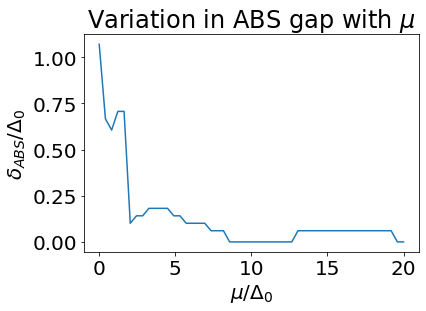

In [52]:
plt.plot(mu_range,ABS_gap)
plt.xlabel(r"$\mu/\Delta_{0}$")
plt.ylabel(r"$\delta_{ABS}/\Delta_{0}$")
plt.title("Variation in ABS gap with $\mu$")

In [68]:
N_vals = range(100,300,5)
ABS_gap_N=np.zeros(shape=(len(N_vals)))
for k in range(0,len(N_vals)):
    for l in range(0,len(E_range)):
        _,_,temp_DOS[l]=greens_function_E(E=E_range[l],phi=np.pi,mu=5,N=N_vals[k])
    maxima=[]
    print(k)
    for l in range(1,len(temp_DOS)-1):
        if((temp_DOS[l]>temp_DOS[l+1])and( temp_DOS[l]>temp_DOS[l-1])):
            maxima.append(l)
    try: ABS_gap_N[k]=E_range[maxima[1]]-E_range[maxima[0]]
    except:
        print("except") 
        ABS_gap_N[k]=0
    

C:\Users\REET\AppData\Local\Temp/ipykernel_20636/1398609262.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  _,_,temp_DOS[l]=greens_function_E(E=E_range[l],phi=np.pi,mu=5,N=N_vals[k])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Text(0.5, 1.0, 'Oscillations in ABS energy gap')

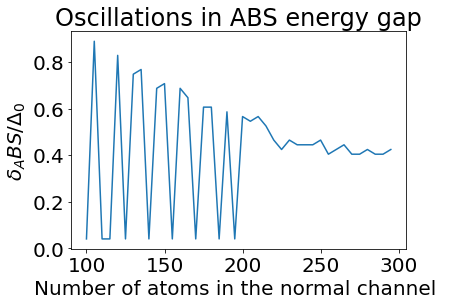

In [69]:
plt.plot(N_vals,ABS_gap_N)
plt.xlabel("Number of atoms in the normal channel ")
plt.ylabel(r"$\delta_ABS/\Delta_{0}$")
plt.title("Oscillations in ABS energy gap")


In [71]:
phi_range=np.linspace(0,2*np.pi,25)
E_range=np.linspace(-1,1,25)
Current_range=np.zeros(shape=(len(phi_range),len(E_range)),dtype=np.complex_)
DOS_range=np.zeros(shape=(len(phi_range),len(E_range)),dtype=np.complex_)

for l in range(0,len(phi_range)):
    for k in range(0,len(E_range)):
        G,Current_range[l,k],DOS_range[l,k] = greens_function_E(E=E_range[k],phi=phi_range[l],mu=0.75)
    print(l)

    
    #print(DOS_range[l])
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


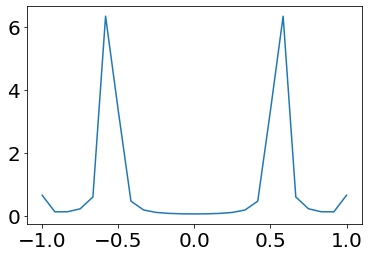

In [72]:
plt.plot(E_range,np.abs(DOS_range[19]))

In [73]:
max_index_1=[]
max_index_2=[]
for k in range(0,len(phi_range)):
    max_index_1.append(np.argmax(DOS_range[k][0:int(len(E_range)/2)]))
    max_index_2.append(np.argmax(DOS_range[k][int(len(E_range)/2):]))
max_index_2_act=np.add(max_index_2,int(len(E_range)/2))    
max_index_1_act=max_index_1

In [74]:
print(max_index_2)

[8, 8, 8, 8, 7, 7, 6, 5, 5, 4, 4, 4, 3, 4, 4, 4, 5, 5, 6, 7, 7, 8, 8, 8, 8]


In [75]:
DOS_range_prime=np.real((np.reshape(DOS_range,(len(phi_range),len(E_range)))))





In [76]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

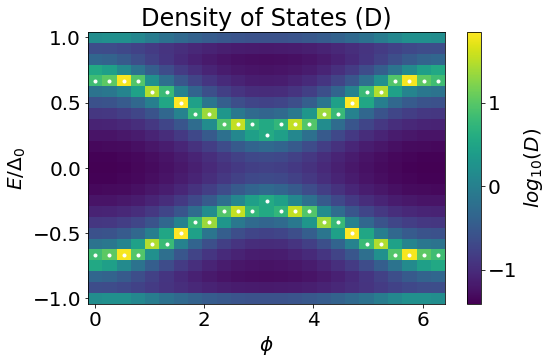

In [77]:
cmap = plt.get_cmap('viridis',len(DOS_range_prime.flatten()))
figure(figsize = (8,5 ))
px = plt.pcolormesh(phi_range,E_range,np.log10(np.real(np.transpose(DOS_range_prime))))
plt.ylabel(r"$E/\Delta_{0}$")
plt.xlabel(r"$ \phi $")
plt.title("Density of States (D)")
#plt.plot(phi_range,E_range,'w--',markersize='20')
norm = mpl.colors.Normalize(vmin=min((np.log10(DOS_range_prime.flatten()))), \
                            vmax=max((np.log10(DOS_range_prime.flatten())))) 
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

for k in range(0,len(max_index_1_act)):
    plt.scatter(phi_range[k],E_range[max_index_1_act[k]],marker='.',c='white')

for k in range(0,len(max_index_2_act)):
    plt.scatter(phi_range[k],E_range[max_index_2_act[k]],marker='.',c='white')
        
plt.colorbar(sm,label="$log_{10} (D )$")
plt.show()



In [80]:
plt.plot(E_range,np.real(Current_range[42][:]))

IndexError: index 42 is out of bounds for axis 0 with size 25

In [87]:
T=0.001
currents_phi=np.zeros(shape=(len(phi_range)),dtype=np.complex_)

for l in range(0,len(phi_range)):
    for k in range(0,len(E_range)):
        currents_phi[l]+= Current_range[l][k]* fermi(E_range[k],T)
    

C:\Users\REET\AppData\Local\Temp/ipykernel_20636/3031927331.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(E/T)+1)


In [82]:
def fermi(E,T):
     return 1/(np.exp(E/T)+1)

In [84]:
currents_phi[24]

(-6.860303428172233e-14-145.0009878938753j)

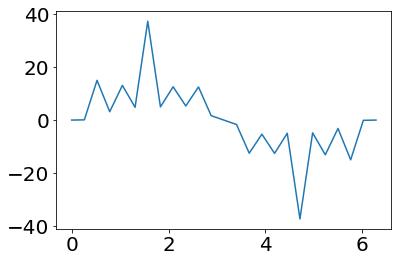

In [88]:
plt.plot(phi_range,np.real(currents_phi))


In [ ]:
plt.plot()

In [624]:
#rough

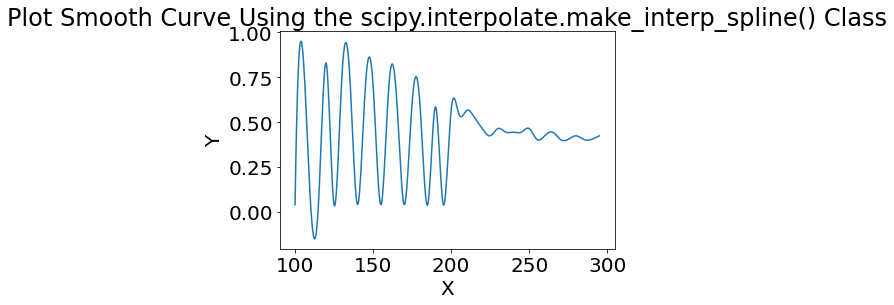

In [90]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
 
X_Y_Spline = make_interp_spline(N_vals, ABS_gap_N)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(np.min(N_vals), np.max(N_vals), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()